In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
data=load_iris()

df=pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

df['is_virginica']= np.where(df['target'] == 2,1,0)

In [19]:
X=df.drop(columns=['target','is_virginica'])
y=df['is_virginica']

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=1324)
X_train=np.c_[np.ones(X_train.shape[0]),X_train]
X_test=np.c_[np.ones(X_test.shape[0]),X_test]

theta=np.zeros(X_train.shape[1])

In [20]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(X,y,theta):
    z=np.dot(X,theta)
    h=sigmoid(z)
    return (-y*np.log(h)-(1-y)*np.log(1-h)).mean()

def gradientdescent(X, y, theta, alpha, iterations):
    cost_history=[]
    for i in range(iterations): 
        z=np.dot(X,theta)
        h=sigmoid(z)
        gradient=np.dot(X.T,(h-y))/y.size
        theta=theta-alpha*gradient
        cost=cost_function(X,y,theta)
        cost_history.append(cost)
    return theta, cost_history

iterations = 1000
learning_rate = 0.01
theta, cost_history = gradientdescent(X_train, y_train, theta, learning_rate, iterations)

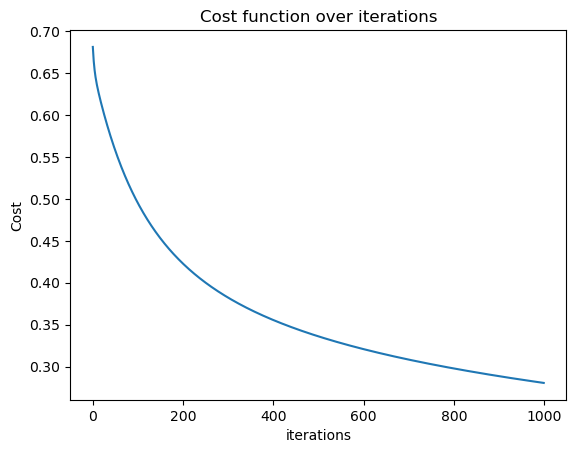

In [12]:
#plot cost function
plt.plot(range(iterations),cost_history)
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.title("Cost function over iterations")
plt.show()

In [23]:
def predict(Xnew,theta):
    z=np.dot(Xnew,theta)
    return sigmoid(z)

In [24]:
y_prob=predict(X_test, theta)
y_pred=y_prob>=0.5

accuracy=(y_pred==y_test).mean()
precision=np.sum((y_pred==1) & (y_test==1))/np.sum(y_pred==1)
recall=np.sum((y_pred==1) & (y_test==1))/np.sum(y_test==1)
f1=2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


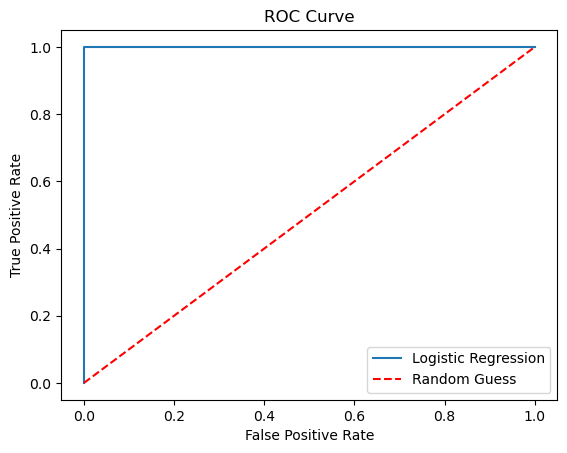

In [29]:
thresholds=np.linspace(0,1,100)
tpr_list=[]
fpr_list=[]

for threshold in thresholds:
    y_predt=y_prob>=threshold
    tp=np.sum((y_predt==1) & (y_test==1))
    fp=np.sum((y_predt==1) & (y_test==0))
    fn=np.sum((y_predt==0) & (y_test==1))
    tn=np.sum((y_predt==0) & (y_test==0))

    tpr=tp/(fn+tp)
    fpr=fp/(tn+fp)

    tpr_list.append(tpr)
    fpr_list.append(fpr)

plt.plot(fpr_list, tpr_list, label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'r--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()